In [1]:
# First we map the drive to access the data file
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#1.We get the data

In [2]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/DSTI/Churn/Bank churn/Bank_churn_dataset.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# We extract the features to make the prediction and the labels
data_to_predict = dataset.iloc[:,3:13]
true_values = dataset.iloc[:,-1]  

In [5]:
data_to_predict.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


#2. We load the models

In [6]:
# we have to install scikeras to be able to use the neural network model
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# We declare the path to the specific_modules.py folder in order to be able to load it
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/projet')

In [9]:
# We load the specific class and function that we use to handle the models
from specific_modules import ModelWrapper, model_nn

In [10]:
# We get the different models that we have trained previously
import glob2
import os

my_files = glob2.glob(os.path.join('/content/drive/MyDrive/Colab Notebooks/projet/trained models basic/', '*.sav'));
my_files = my_files + glob2.glob(os.path.join('/content/drive/MyDrive/Colab Notebooks/projet/trained models smot/', '*.sav'));

print(my_files);

['/content/drive/MyDrive/Colab Notebooks/projet/trained models basic/XGBClassifier trained on basic data.sav', '/content/drive/MyDrive/Colab Notebooks/projet/trained models basic/LogisticRegression trained on basic data.sav', '/content/drive/MyDrive/Colab Notebooks/projet/trained models basic/SVM trained on basic data.sav', '/content/drive/MyDrive/Colab Notebooks/projet/trained models basic/NeuralNetwork trained on basic data.sav', '/content/drive/MyDrive/Colab Notebooks/projet/trained models basic/RandomForest trained on basic data.sav', '/content/drive/MyDrive/Colab Notebooks/projet/trained models smot/XGBClassifier trained on smot data.sav', '/content/drive/MyDrive/Colab Notebooks/projet/trained models smot/NeuralNetwork trained on smot data.sav', '/content/drive/MyDrive/Colab Notebooks/projet/trained models smot/LogisticRegression trained on smot data.sav', '/content/drive/MyDrive/Colab Notebooks/projet/trained models smot/RandomForest trained on smot data.sav', '/content/drive/MyD

In [11]:
# We load thanks to pickle the pipelines of the different models
import pickle

list_of_models =  []

for file in my_files:
  f = open(file, 'rb')
  model = pickle.load(f)
  list_of_models.append(model)

#3.We use the models on the full file to compare the global results

Tag = XGBClassifier trained on basic data
Confusion matrix : array([[7761,  202],
       [1090,  947]])
Precision : 0.824194952132289
Accuracy : 0.8708
Recall : 0.4648993618065783
Roc_auc_score : 0.885103267560923
---------
Tag = LogisticRegression trained on basic data
Confusion matrix : array([[7738,  225],
       [1684,  353]])
Precision : 0.610726643598616
Accuracy : 0.8091
Recall : 0.17329405989199803
Roc_auc_score : 0.7552151331227497
---------
Tag = SVM trained on basic data
Confusion matrix : array([[7858,  105],
       [1343,  694]])
Precision : 0.8685857321652065
Accuracy : 0.8552
Recall : 0.34069710358370153
Roc_auc_score : 0.8412328718901256
---------
Tag = NeuralNetwork trained on basic data
100/100 - 1s - 695ms/epoch - 7ms/step
Confusion matrix : array([[7717,  246],
       [1016, 1021]])
Precision : 0.8058405682715075
Accuracy : 0.8738
Recall : 0.501227295041728
100/100 - 0s - 327ms/epoch - 3ms/step
Roc_auc_score : 0.8834399845480734
---------
Tag = RandomForest trained 

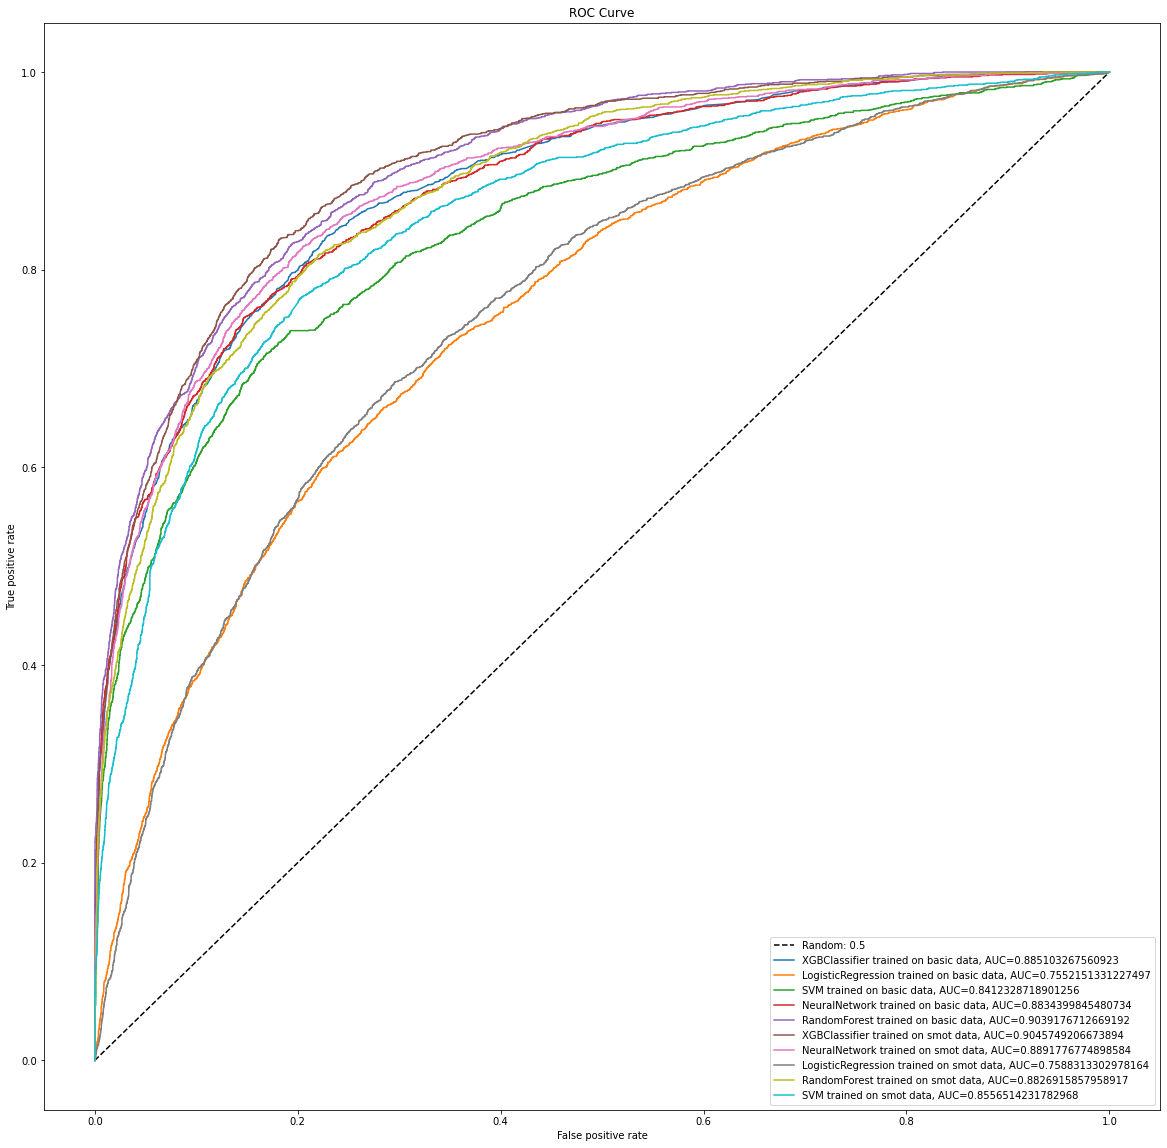

In [12]:
# We perform the predictions and evaluations for all 10 models
import pandas as pd
import matplotlib.pyplot as plt

global_report = pd.DataFrame(columns = ['Tag', 'Description' , 'Confusion matrix', 'Accuracy', 'Precision', 'Recall', 'ROC'])

plt.figure(figsize = (20,20), linewidth= 1)
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')

for model in list_of_models:
  print('Tag = ' + str(model.tag))
  model_predictions = model.predict(data_to_predict)
  model.evaluate(y_true = true_values, y_pred = model_predictions)
  model.calculate_roc(y_true = true_values, y_score = model.predict_proba(data_to_predict)[:,1])
  global_report = global_report.append(model.get_performances(),ignore_index = True)
  plt.plot(model.fpr, model.tpr, label = str(model.tag) + ", AUC=" + str(model.roc_auc_score))
  print('---------')

plt.legend()

In [13]:
# We display the global_report
global_report

,Tag,Description,Confusion matrix,Accuracy,Precision,Recall,ROC
0,XGBClassifier trained on basic data,"GridSearchCV(cv=5, estimator=XGBClassifier(mis...","[[7761, 202], [1090, 947]]",0.8708,0.824195,0.464899,0.885103
1,LogisticRegression trained on basic data,"GridSearchCV(cv=10, estimator=LogisticRegressi...","[[7738, 225], [1684, 353]]",0.8091,0.610727,0.173294,0.755215
2,SVM trained on basic data,"GridSearchCV(cv=3, estimator=SVC(),\n ...","[[7858, 105], [1343, 694]]",0.8552,0.868586,0.340697,0.841233
3,NeuralNetwork trained on basic data,KerasClassifier(\n\tmodel=<function model_nn a...,"[[7717, 246], [1016, 1021]]",0.8738,0.805841,0.501227,0.883440
4,RandomForest trained on basic data,"GridSearchCV(cv=5, estimator=RandomForestClass...","[[7803, 160], [1076, 961]]",0.8764,0.857270,0.471772,0.903918
5,XGBClassifier trained on smot data,"GridSearchCV(cv=5, estimator=XGBClassifier(mis...","[[7164, 799], [595, 1442]]",0.8606,0.643463,0.707904,0.904575
6,NeuralNetwork trained on smot data,KerasClassifier(\n\tmodel=<function model_nn a...,"[[6952, 1011], [549, 1488]]",0.8440,0.595438,0.730486,0.889178
7,LogisticRegression trained on smot data,"GridSearchCV(cv=10, estimator=LogisticRegressi...","[[5610, 2353], [640, 1397]]",0.7007,0.372533,0.685812,0.758831
8,RandomForest trained on smot data,"GridSearchCV(cv=5, estimator=RandomForestClass...","[[7060, 903], [629, 1408]]",0.8468,0.609260,0.691213,0.882692
9,SVM trained on smot data,"GridSearchCV(cv=3, estimator=SVC(),\n ...","[[6330, 1633], [463, 1574]]",0.7904,0.490801,0.772705,0.855651


# 4.Conclusion

When processing the complete data file, we can conclude that the model XGBClassifier trained on smot data is the best with a ROC of 0.904575 which is quite efficient for a classification model